### BIKE SHARING ASSIGNMENT

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Loading the data from csv file

In [283]:
data=pd.read_csv("day.csv")

In [284]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [285]:
### Inspecting for the data distribution
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [147]:
### Information about the column values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [148]:
### Dataset's dimension
data.shape

(730, 16)

### Exploring categorical columns of the dataset

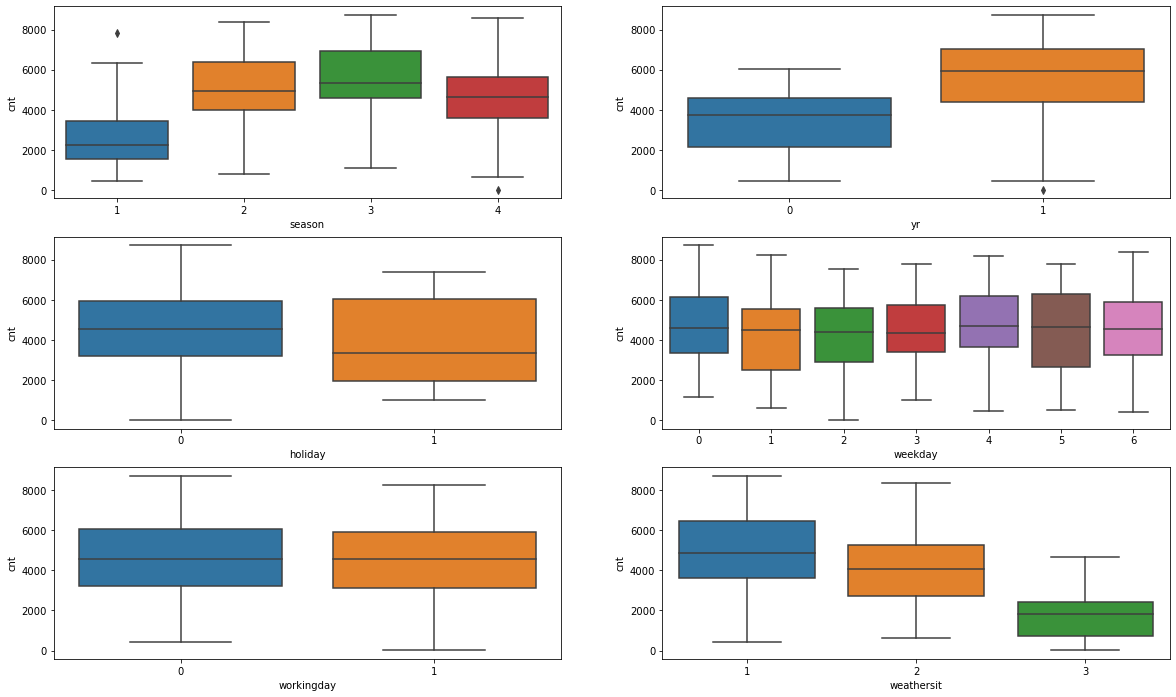

In [149]:

plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

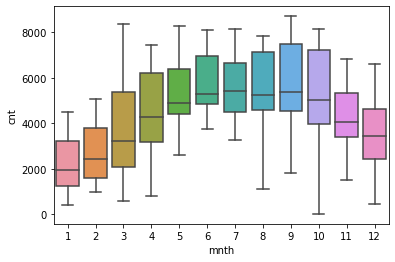

In [150]:
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.show()

#### Dropping "CASUAL" and "REGISTERED" columns as they more or less represent the target variables

In [151]:
data.drop(['casual','registered'],axis=1,inplace=True)

In [152]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Removing "INSTANT" column as indexes are not efficient to be used as independent variable
#### Removing "DTEDAY" column as we already have 'yr' and 'mnth' data 

In [153]:
data.drop(['instant','dteday'],axis=1,inplace=True)

In [154]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [156]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [157]:
### Inspecting datatypes
data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [158]:
data.shape

(730, 12)

In [159]:
### Looking out for null values
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### DUMMY variable creation for categorical columns

In [160]:
### 'season' column has different categories to be handled
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

#### "SEASON" has 4 categorical values, hence dummy variable is created

In [161]:
dummy_1=pd.get_dummies(data['season'],drop_first=True)

In [162]:
### Renaming the columns of dummy variables for better understanding
dummy_1.columns=['season_summer','season_fall','season_winter']

In [163]:
dummy_1.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [164]:
dummy_1.dtypes

season_summer    uint8
season_fall      uint8
season_winter    uint8
dtype: object

In [165]:
### Merging the dummy variables with the original dataset
data=pd.concat([data,dummy_1],axis=1)

In [166]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,0,0,0
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,0,0,0
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,0,0,0
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,0


In [167]:
#### Dropping season column as the dummy columns are already merged with original data
data.drop(['season'],axis=1,inplace=True)

In [168]:
data

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,0,0,0
726,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,0,0,0
727,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,0,0,0
728,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,0


In [169]:
data.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

##### 'MNTH' column has 12 categories, adding dummy variables instead

In [170]:
dummy_2=pd.get_dummies(data.mnth,drop_first=True)

In [171]:
###Renaming the 'mnth' columns for convenience
dummy_2.columns=['mnth_feb','mnth_mar','mnth_apr','mnth_may','mnth_jun','mnth_jul','mnth_aug','mnth_sep','mnth_oct','mnth_nov','mnth_dec']

In [172]:
dummy_2.head()

,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [173]:
#### Concating mnth dummy columns with dataset
data=pd.concat([data,dummy_2],axis=1)

In [174]:
data

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,...,0,0,0,0,0,0,0,0,0,1
726,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,1
727,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,...,0,0,0,0,0,0,0,0,0,1
728,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,...,0,0,0,0,0,0,0,0,0,1


#### Dropping off 'MNTH' column 

In [175]:
data.drop('mnth',axis=1,inplace=True)

In [176]:
data

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,...,0,0,0,0,0,0,0,0,0,1
726,1,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,...,0,0,0,0,0,0,0,0,0,1


In [177]:
data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [178]:
data.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

#### 'WEEKDAY' has 7 categories, converting dummy variables

In [179]:
dummy_3=pd.get_dummies(data.weekday,drop_first=True)

In [180]:
### Adding dummy variables to weekdays 
dummy_3.columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [181]:
dummy_3.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [182]:
#### merging weekdays with dataset
data=pd.concat([data,dummy_3],axis=1)

In [183]:
data

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,1,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,...,0,0,0,1,0,0,0,0,1,0
726,1,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,...,0,0,0,1,0,0,0,0,0,0
728,1,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,...,0,0,0,1,1,0,0,0,0,0


#### Dropping the 'weekday' column 

In [184]:
data.drop(['weekday'],axis=1,inplace=True)

In [185]:
data

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,2,10.420847,11.33210,65.2917,23.458911,2114,0,...,0,0,0,1,0,0,0,0,1,0
726,1,0,0,2,10.386653,12.75230,59.0000,10.416557,3095,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,1,1,10.489153,11.58500,48.3333,23.500518,1796,0,...,0,0,0,1,1,0,0,0,0,0


In [186]:
data.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [187]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Creating dummy variables for 'WEATHERSIT'

In [188]:
dummy_4=pd.get_dummies(data.weathersit,drop_first=True)

In [189]:
dummy_4

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [190]:
#### Renaming weather situation
dummy_4.columns=['weather_mist','weather_light_snow']

In [191]:
dummy_4

,weather_mist,weather_light_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [192]:
##### Concatenating weathersit dummy variables with dataset 
data=pd.concat([data,dummy_4],axis=1)

In [193]:
data

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,2,10.420847,11.33210,65.2917,23.458911,2114,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,2,10.386653,12.75230,59.0000,10.416557,3095,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,1,10.489153,11.58500,48.3333,23.500518,1796,0,...,0,1,1,0,0,0,0,0,0,0


In [194]:
#### Dropping 'WEATHERSIT' column
data.drop(['weathersit'],axis=1,inplace=True)

In [195]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


### Performing EDA on the data- Univariate Analysis

In [196]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'mnth_feb',
       'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'weather_mist',
       'weather_light_snow'],
      dtype='object')

In [197]:
varlist=['season_summer', 'season_fall', 'season_winter', 'mnth_feb',
       'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'weather_mist',
       'weather_light_snow','holiday', 'workingday']

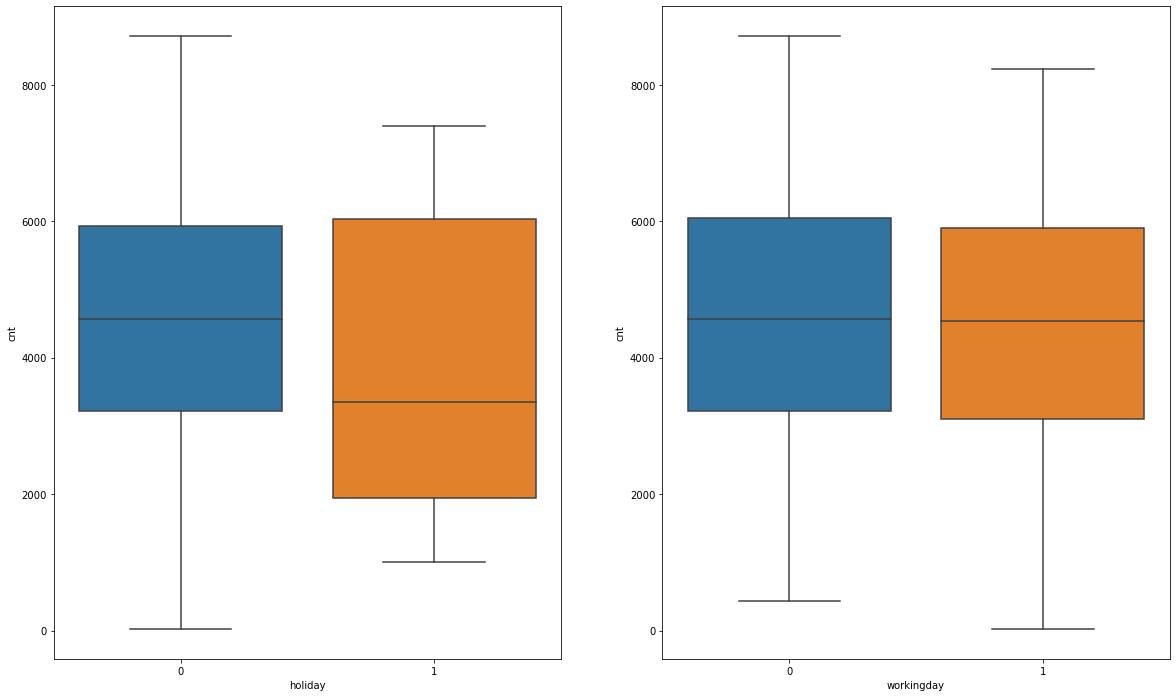

In [198]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)

plt.show()

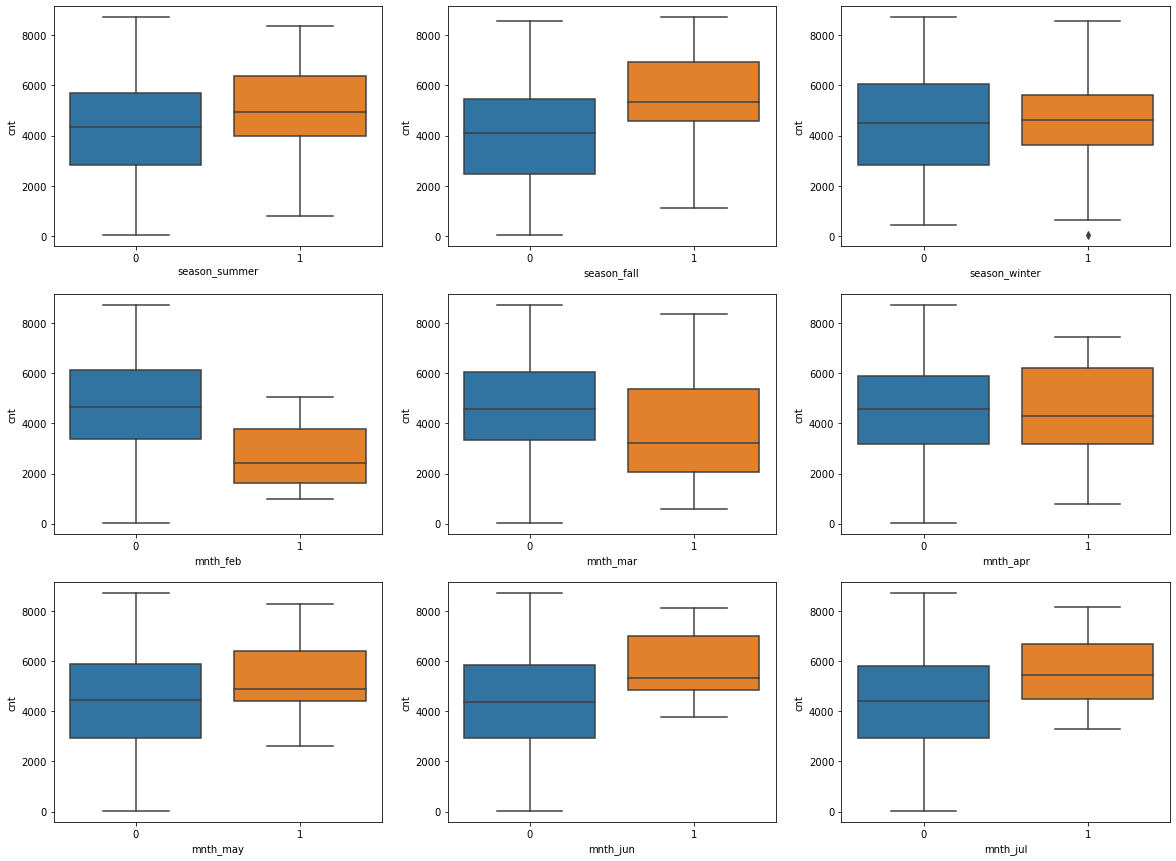

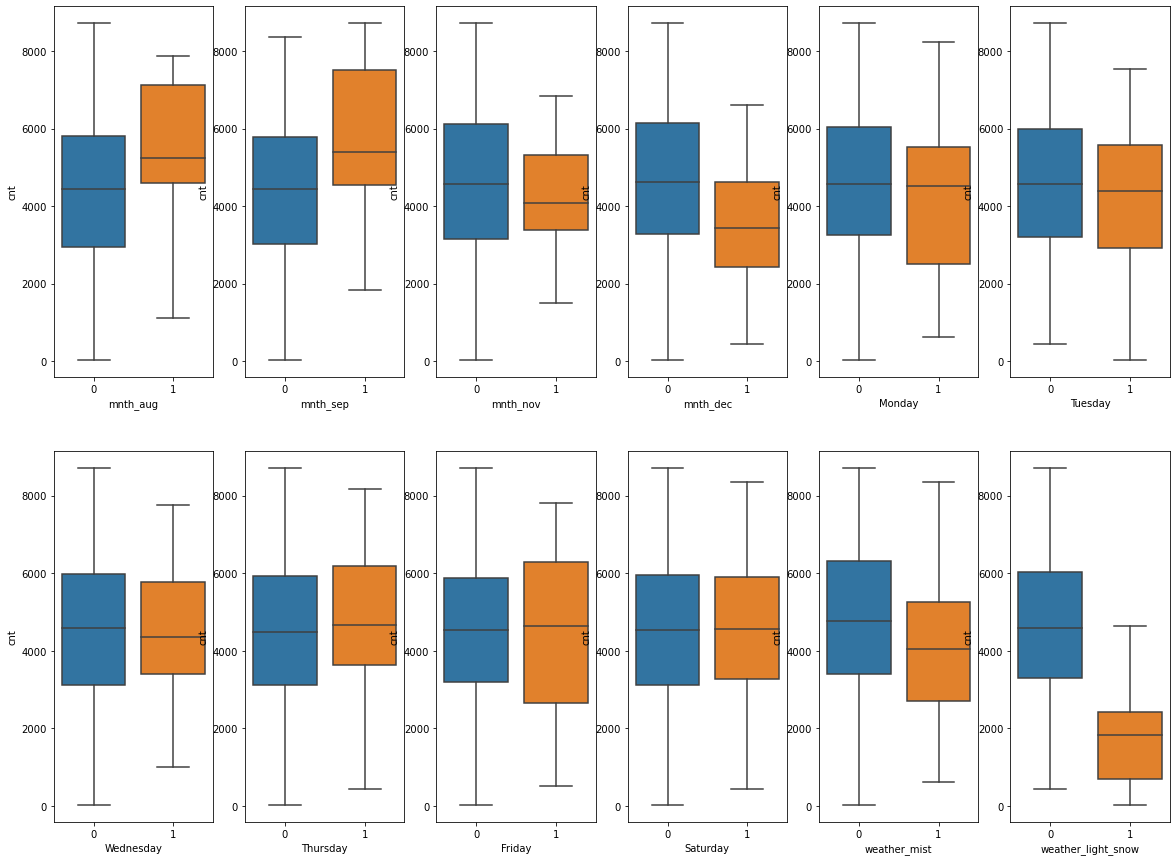

In [199]:
###plotting after adding dummy variables
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season_summer', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'season_fall', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'season_winter', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth_feb', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth_mar', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth_apr', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth_may', y = 'cnt', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'mnth_jun', y = 'cnt', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'mnth_jul', y = 'cnt', data = data)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,6,1)
sns.boxplot(x = 'mnth_aug', y = 'cnt', data = data)
plt.subplot(2,6,2)
sns.boxplot(x = 'mnth_sep', y = 'cnt', data = data)
plt.subplot(2,6,3)
sns.boxplot(x = 'mnth_nov', y = 'cnt', data = data)
plt.subplot(2,6,4)
sns.boxplot(x = 'mnth_dec', y = 'cnt', data = data)
plt.subplot(2,6,5)
sns.boxplot(x = 'Monday', y = 'cnt', data = data)
plt.subplot(2,6,6)
sns.boxplot(x = 'Tuesday', y = 'cnt', data = data)
plt.subplot(2,6,7)
sns.boxplot(x = 'Wednesday', y = 'cnt', data = data)
plt.subplot(2,6,8)
sns.boxplot(x = 'Thursday', y = 'cnt', data = data)
plt.subplot(2,6,9)
sns.boxplot(x = 'Friday', y = 'cnt', data = data)
plt.subplot(2,6,10)
sns.boxplot(x = 'Saturday', y = 'cnt', data = data)
plt.subplot(2,6,11)
sns.boxplot(x = 'weather_mist', y = 'cnt', data = data)
plt.subplot(2,6,12)
sns.boxplot(x = 'weather_light_snow', y = 'cnt', data = data)

plt.show()

### Bivariate analysis of numerical variables

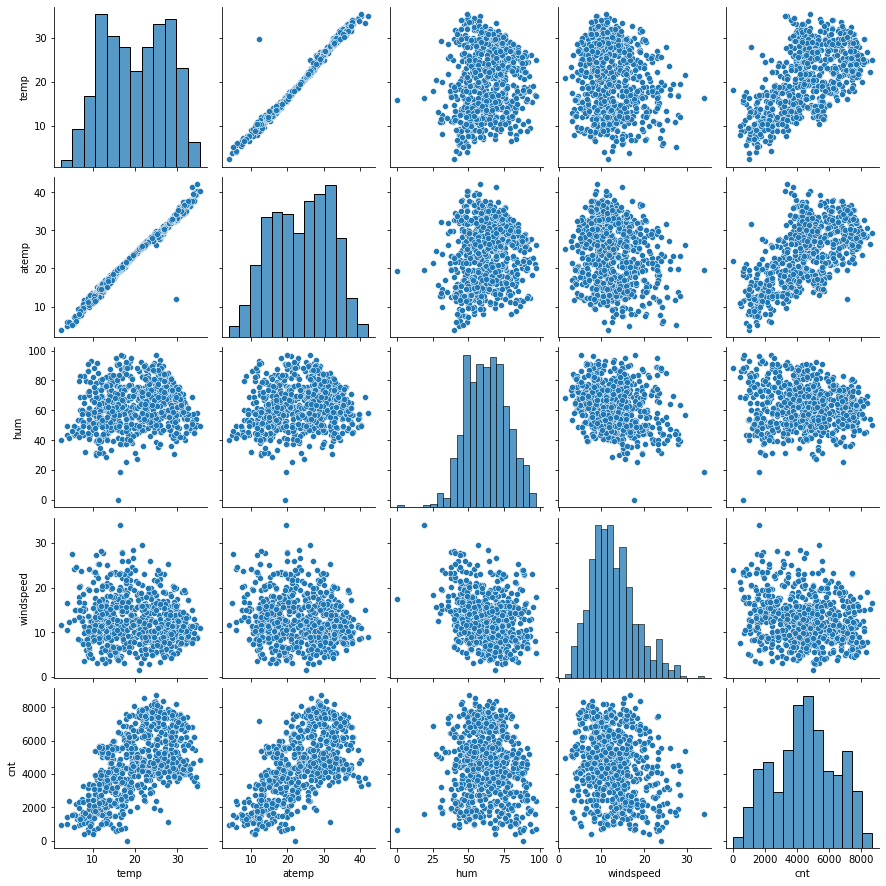

In [200]:
#### plotting the numerical variables
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed',
       'cnt']] )
plt.show()

### Multivariate Analysis

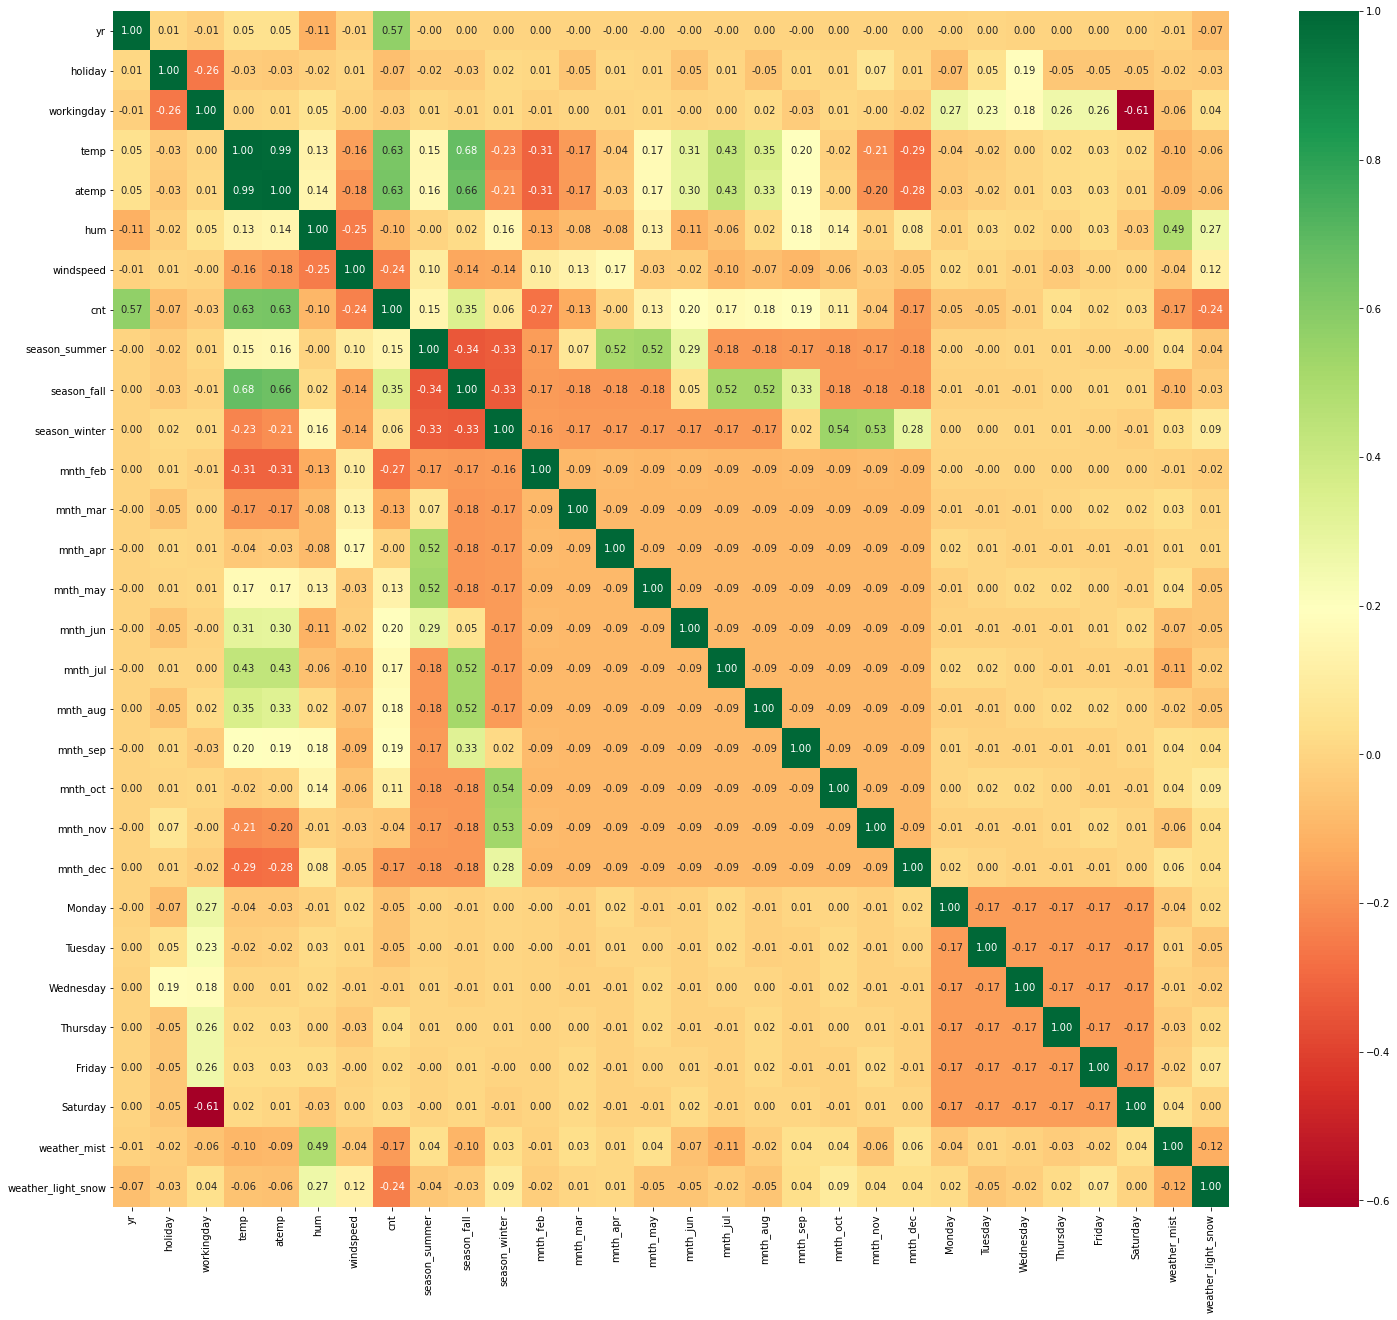

In [201]:
### Heatmap to analyse correlation
plt.figure(figsize=(25,22))
sns.heatmap(data.corr(),cmap='RdYlGn',fmt='.2f',annot=True)
plt.show()

### Splitting into train and test data

In [202]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [203]:
##Splitting the data in the ratio 70:30

X_train,Y_train=train_test_split(data,train_size=0.7,random_state=100)

In [204]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.09770,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,1,...,0,0,0,0,0,0,1,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,1,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,1,1,0,0,0,0,0,1,0
79,0,0,1,17.647835,20.48675,73.7391,19.348461,2077,1,0,...,0,0,0,0,1,0,0,0,1,0


In [205]:
Y_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,1,0,0,1,0,0,0,0,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,1,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,1,0,0,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,1,0,0,0,0,0


### Scaling the train data

In [206]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
### variables chosen for scaling
varlist=['temp','atemp','hum','windspeed','cnt']

In [208]:
from sklearn.preprocessing import MinMaxScaler

In [209]:
### Using minmaxscaler as a scaling method 
scaler=MinMaxScaler()

In [210]:
X_train[varlist]=scaler.fit_transform(X_train[varlist])

In [211]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
### Target variable
y_train_=X_train.pop('cnt')

In [213]:
y_train_

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [214]:
###independent variables
X_train_=X_train

In [215]:
X_train_

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,...,0,0,0,0,0,0,1,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,1,1,0,0,0,0,0,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### Feature Selection-RFE

#### Using Automatic feature selection technique

In [216]:
from sklearn.feature_selection import RFE

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
lm=LinearRegression()

In [219]:
### Building a linear model
lm=lm.fit(X_train_,y_train_)

In [220]:
#### Fitting rfe with the linear model
rfe=RFE(lm,15)
rfe=rfe.fit(X_train_,y_train_)

In [221]:
### Viewing the top 15 ranked indepndent variables
list(zip(X_train_.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_mar', True, 1),
 ('mnth_apr', False, 3),
 ('mnth_may', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_jul', False, 12),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 13),
 ('mnth_dec', False, 14),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 8),
 ('Thursday', False, 6),
 ('Friday', False, 7),
 ('Saturday', False, 15),
 ('weather_mist', True, 1),
 ('weather_light_snow', True, 1)]

In [222]:
### 15 columns that was found appropriate from RFE
X_train_.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow'],
      dtype='object')

In [223]:
#### Remaining columns that is chosen to be removed for the model building
X_train_.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_feb', 'mnth_apr', 'mnth_jun', 'mnth_jul',
       'mnth_nov', 'mnth_dec', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday'],
      dtype='object')

#### Manual feature elimination

In [224]:
### Using the cols selected using RFE to build the model
cols_list=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow']

In [225]:
X_train_[cols_list]

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,1,0,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,1,0,0,1,0,0,0,0,1,0


### Model Building

In [226]:
### Adding constant columns for statsmodels regression
X_train_sm=sm.add_constant(X_train_[cols_list])

In [227]:
### Xtrain with constant
X_train_sm

,const,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,1,0,0,0,1,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1,0
79,1.0,0,0,0.462664,0.759870,0.529881,1,0,0,1,0,0,0,0,1,0


In [228]:
#### y train with cnt column(target variable)
y_train_

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [229]:
X_train_sm.shape

(510, 16)

In [230]:
### Fitting the model with indepenent and dependent variables
lm_sm=sm.OLS(y_train_,X_train_sm).fit()

In [231]:
lm_sm.params

const                 0.237384
yr                    0.230442
holiday              -0.088900
temp                  0.486920
hum                  -0.179606
windspeed            -0.183865
season_summer         0.116592
season_fall           0.042479
season_winter         0.152975
mnth_mar              0.032292
mnth_may              0.028201
mnth_aug              0.050905
mnth_sep              0.120667
mnth_oct              0.040741
weather_mist         -0.054170
weather_light_snow   -0.242870
dtype: float64

In [232]:
### Summary statistics of trained model
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.00e-188
Time:                        15:17:03   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2374      0.027      8.665      0.000       0.184       0.291
yr                     0.2304      0.008     28.453      0.000       0.215       0.246
holiday               -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp                   0.4869      0.034     14.119      0.000       0.419       0.555
hum                   -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed             -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_summer          0.1166      0.015      7.527      0.000       0.086       0.147
season_fall            0.0425      0.023      1.847      0.065      -0.003       0.088
season_winter          0.1530      0.014     10.801      0.000       0.125       0.181
mnth_mar               0.0323      0.015      2.196      0.029       0.003       0.061
mnth_may               0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_aug               0.0509      0.017      2.913      0.004       0.017       0.085
mnth_sep               0.1207      0.017      6.984      0.000       0.087       0.155
mnth_oct               0.0407      0.018      2.314      0.021       0.006       0.075
weather_mist          -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weather_light_snow    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observed R2 values for the above model
- R-squared             |  0.845
- Adjusted R-Squared    |  0.840

#### VIF- To identify multicollinearity

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [234]:
### calculating VIF for each column
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.52
7,season_fall,6.49
3,temp,3.83
6,season_summer,2.83
8,season_winter,2.36
4,hum,1.93
11,mnth_aug,1.68
10,mnth_may,1.56
14,weather_mist,1.56
13,mnth_oct,1.52


#### Observing p-values and VIF
- For 'mnth_may' column the p-value is high(0.115>0.05), but VIF remains significant
- Considering the high p-value, proceeding to remove 'mnth_may'

In [235]:
### Reassigning the necessary columns without mnth_may
cols_list=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow']

In [236]:
X_train_[cols_list]

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,1,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,1,0,0,1,0,0,0,1,0


In [237]:
X_train_sm=sm.add_constant(X_train_[cols_list])

In [238]:
### Refitting the model ith the newly assigned columns
lm_sm=sm.OLS(y_train_,X_train_sm).fit()

In [239]:
## Summary after removing mnth_may column
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.46e-189
Time:                        15:17:29   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2322      0.027      8.525      0.000       0.179       0.286
yr                     0.2298      0.008     28.366      0.000       0.214       0.246
holiday               -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp                   0.4965      0.034     14.604      0.000       0.430       0.563
hum                   -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed             -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_summer          0.1225      0.015      8.137      0.000       0.093       0.152
season_fall            0.0361      0.023      1.593      0.112      -0.008       0.081
season_winter          0.1502      0.014     10.671      0.000       0.123       0.178
mnth_mar               0.0279      0.014      1.931      0.054      -0.000       0.056
mnth_aug               0.0505      0.018      2.883      0.004       0.016       0.085
mnth_sep               0.1202      0.017      6.946      0.000       0.086       0.154
mnth_oct               0.0393      0.018      2.231      0.026       0.005       0.074
weather_mist          -0.0544      0.010     -5.199      0.000      -0.075      -0.034
weather_light_snow    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observed R2 values for the above model
- R-squared             |  0.844
- Adjusted R-Squared    |  0.840

In [240]:
### VIF
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
7,season_fall,6.29
3,temp,3.72
6,season_summer,2.66
8,season_winter,2.33
4,hum,1.90
10,mnth_aug,1.68
13,weather_mist,1.56
12,mnth_oct,1.51
11,mnth_sep,1.40


#### Observing p-value and VIF
- 'season_fall' has p-value (0.112>0.05),which  is higher than expected along with high VIF
- It is recommene to remove season_fall column

In [241]:
#### Removing 'season_fall' column because of high p-value 
cols_list=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
        'season_winter', 'mnth_mar', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow']

In [242]:
X_train_[cols_list]

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_mar,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,1,0,1,0,0,0,1,0


In [243]:
X_train_sm=sm.add_constant(X_train_[cols_list])

In [244]:
#### Refitting the model
lm_sm=sm.OLS(y_train_,X_train_sm).fit()

In [245]:
### Summary after removing season_fall
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.94e-190
Time:                        15:17:53   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2326      0.027      8.525      0.000       0.179       0.286
yr                     0.2287      0.008     28.289      0.000       0.213       0.245
holiday               -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp                   0.5371      0.023     23.855      0.000       0.493       0.581
hum                   -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed             -0.1893      0.026     -7.388      0.000      -0.240      -0.139
season_summer          0.1059      0.011      9.743      0.000       0.085       0.127
season_winter          0.1393      0.012     11.304      0.000       0.115       0.163
mnth_mar               0.0233      0.014      1.642      0.101      -0.005       0.051
mnth_aug               0.0605      0.016      3.699      0.000       0.028       0.093
mnth_sep               0.1292      0.016      7.897      0.000       0.097       0.161
mnth_oct               0.0355      0.017      2.032      0.043       0.001       0.070
weather_mist          -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weather_light_snow    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observed R2 values for the above model
- R-squared             |  0.843
- Adjusted R-Squared    |  0.839

In [246]:
### VIF
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
4,hum,1.86
7,season_winter,1.78
3,temp,1.62
12,weather_mist,1.55
11,mnth_oct,1.48
9,mnth_aug,1.46
6,season_summer,1.38
10,mnth_sep,1.25
13,weather_light_snow,1.24


#### Observing p-value and VIF
- 'mnth_mar' that has high p-value (0.101>0.05)
-  Removing 'mnth_mar' based on p-value

In [247]:
#### After eliminating mnth_mar
cols_list=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
        'season_winter', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow']

In [248]:
X_train_[cols_list]

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,0
79,0,0,0.462664,0.759870,0.529881,1,0,0,0,0,1,0


In [249]:
X_train_sm=sm.add_constant(X_train_[cols_list])

In [250]:
##### Refitting the model
lm_sm=sm.OLS(y_train_,X_train_sm).fit()

#### Final summary statistics 

In [251]:
### Summary after removing mnth_mar
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.49e-190
Time:                        15:18:14   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2390      0.027      8.838      0.000       0.186       0.292
yr                     0.2289      0.008     28.264      0.000       0.213       0.245
holiday               -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                   0.5316      0.022     23.836      0.000       0.488       0.575
hum                   -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed             -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_summer          0.1058      0.011      9.719      0.000       0.084       0.127
season_winter          0.1353      0.012     11.180      0.000       0.112       0.159
mnth_aug               0.0585      0.016      3.583      0.000       0.026       0.091
mnth_sep               0.1277      0.016      7.803      0.000       0.096       0.160
mnth_oct               0.0358      0.018      2.046      0.041       0.001       0.070
weather_mist          -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weather_light_snow    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observed R2 values for the above model
- R-squared             |  0.842
- Adjusted R-Squared    |  0.839

#### Final VIF

In [252]:
### VIF
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.88
4,hum,1.86
7,season_winter,1.71
3,temp,1.59
11,weather_mist,1.55
10,mnth_oct,1.48
8,mnth_aug,1.45
6,season_summer,1.38
9,mnth_sep,1.24
12,weather_light_snow,1.24


### Residual Analysis of train data

In [253]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'weather_mist',
       'weather_light_snow'],
      dtype='object')

In [254]:
### predicting the y_train values 
y_train_pred=lm_sm.predict(X_train_sm)

In [255]:
y_train_pred

576    0.719877
426    0.485875
728    0.383747
482    0.603996
111    0.267713
         ...   
578    0.827203
53     0.246682
350    0.267443
79     0.300546
520    0.657589
Length: 510, dtype: float64

In [256]:
## Residual errors
res_train=y_train_-y_train_pred

In [257]:
res_train

576    0.107780
426   -0.020619
728   -0.179652
482   -0.121023
111   -0.076618
         ...   
578    0.005631
53    -0.028665
350    0.045143
79    -0.064122
520    0.145333
Length: 510, dtype: float64

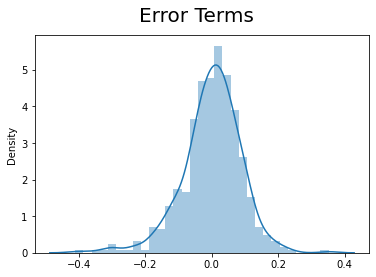

In [258]:
#### Plotting the error using distplot
### NORMAL DISTRIBUTION OF THE ERROR TERMS IS OBSERVED
fig = plt.figure()
sns.distplot(res_train)
fig.suptitle('Error Terms', fontsize = 20)
plt.show()

#### Observing error terms
- Error terms are normally distributed around mean of 0

### Predicting the test data

In [259]:
Y_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_mist,weather_light_snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [260]:
#### choosing columns for scaling test data
col_list=['temp','atemp','hum','windspeed','cnt']

In [261]:
#### Transforming the scaled values
Y_train[col_list]=scaler.transform(Y_train[col_list])

In [262]:
### Assigning target variable to y_test
y_test_=Y_train.pop('cnt')

In [263]:
### Assigning other variables to x_test
X_test_=Y_train

In [264]:
cols_list=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
        'season_winter', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weather_mist', 'weather_light_snow']

In [265]:
X_test_sm=sm.add_constant(X_test_[cols_list])

In [266]:
X_test_sm

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,mnth_oct,weather_mist,weather_light_snow
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,0,1,1,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.756118,0.283397,0,1,0,0,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0
640,1.0,1,0,0.745598,0.817947,0.052115,0,1,0,0,1,1,0
72,1.0,0,0,0.331557,0.512107,0.203418,0,0,0,0,0,0,0


In [267]:
### Prediction using the test data
y_test_pred=lm_sm.predict(X_test_sm)

In [268]:
#### Residuals of test data
test_res=y_test_-y_test_pred

### Model evaluation

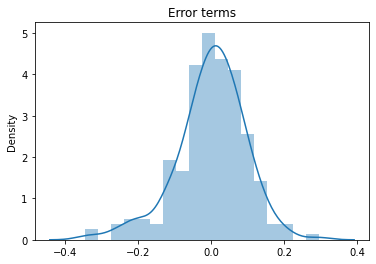

In [269]:
###Plotting to find the distribution of error terms
plt.title("Error terms")
sns.distplot(test_res)
plt.show()

#### Observation of error terms for test data
- Error terms are normally distributed for test data as well

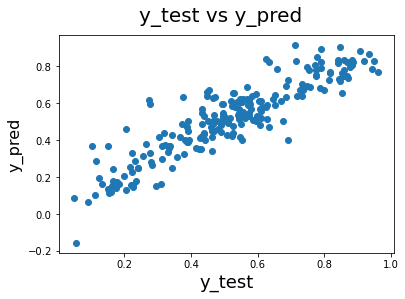

In [270]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()

#### Homoscedasticity is observed among the error terms with no visible pattern

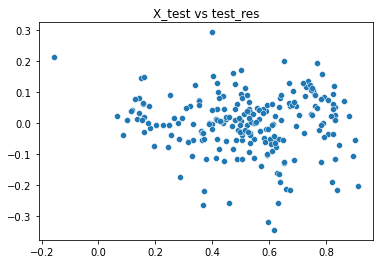

In [271]:
###  Plotting X_test_ vs y_test_pred
sns.scatterplot(y_test_pred,test_res)

plt.title('X_test vs test_res')
plt.show()

In [272]:
from sklearn.metrics import r2_score

### R2 score for test and train

In [273]:
#### Calculating r2_score for the test data
r_squared = r2_score(y_test_, y_test_pred)

In [274]:
### Obtained r2_score for test data
r_squared

0.8116537323246351

In [275]:
#### r2_score for the train data
r2_score(y_train_, y_train_pred)

0.8423598708518262

In [276]:
from sklearn.metrics import mean_squared_error

In [277]:
### Calculating mean squared error
np.sqrt(mean_squared_error(y_test_,y_test_pred))

0.0948980562857725

#### COMPARING R2 SCORE FOR TEST AND TRAIN DATA
- The `test data` has acquired a r2_score of 0.8116537323246351, which is quite close to the r2_score of the `train data`         0.8423598708518262
- Hence the model is considered to be significant


##### The equation of the best fitted line

cnt=(0.2289 X yr)+(-0.0941 X holiday)+(0.5316 X temp)+(-0.1818 X hum)+(-0.1868 X windspeed)+(0.1058 X season_summer)+(0.1353 X season_winter)+(0.0585 X mnth_aug) +(0.1277 X mnth_sep) +(0.0358 X mnth_oct) +(-0.0531 X weather_mist) +(-0.2385 X weather_light_snow)
		
		
		
		
		
		
		
		
		
		
	

### We have arrived at 12 features finally to predict the demand of bikes
- yr
- holiday
- temp
- hum
- winspeed
- season_summer
- season_winter
- mnth_aug
- mnth_sep
- mnth_oct
- weather_mist
- weather_light_snow

Climatic conditions influence the demand of bikes from the above built model